<a href="https://colab.research.google.com/github/PurvaMavani/FoodHub-Data-Analysis/blob/main/PYF_Project_LearnerNotebook_FullCode_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [ ]:
# mount google drive for colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python course/foodhub_order.csv')
#df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows/'
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Checking the shape of Dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 1898 rows and 9 columns


#### Observations:
The dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations:
Total columns: 9

dtypes(count): float64(1), int64(4), object(4)

There are a total of following 9 columns and their headings and respective data types are as follows:

* order_id: int64
* customer_id: int64
* restaurant_name: object
* cuisine_type: object
* cost_of_the_order: float64
* day_of_the_week: object
* rating: object
* food_preperation_time: int64
* delivery_time: int64

The order_id, customer_id, food_preperation_time and delivery_time columns are all of the datatype int64.

The restaurant_name, cuisine_type, day_of_the_week and rating columns are all of the object datatype.

cost_of_the_order column has a datatype float.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# checking the missing values of data
df.isnull().sum().sum()

0

#### Observations:
There are no missing values in the dataframe.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Getting statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
The statistics for food_preperation_time are as follows:

*   minimum: 20 mins
*   maximum: 35 mins
*   average: 27.37 mins



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Counting the orders which are not rated
len(df[(df.rating=="Not given")])

736

In [ ]:
# Counting the orders which are not rated
df.loc[df["rating"]=="Not given"].shape[0]

736

#### Observations:
736 orders have not been given any ratings.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# Order ID

In [ ]:
# Checking unique order ID
df['order_id'].nunique()

1898

Observation:
There are 1898 unique Order ID in Dataset.

# Customer ID

In [ ]:
#checking unique Customer ID
df['customer_id'].nunique()

1200

Observation: There are 1200 unique Customer ID in Dataset.

#Restaurant Name

In [ ]:
#Checking unique Restaurant Name
df['restaurant_name'].nunique()

178

Observation: There are 178 unique Restaurants in Dataset.

# Cuisine Type

In [ ]:
#checking unique cuisines
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

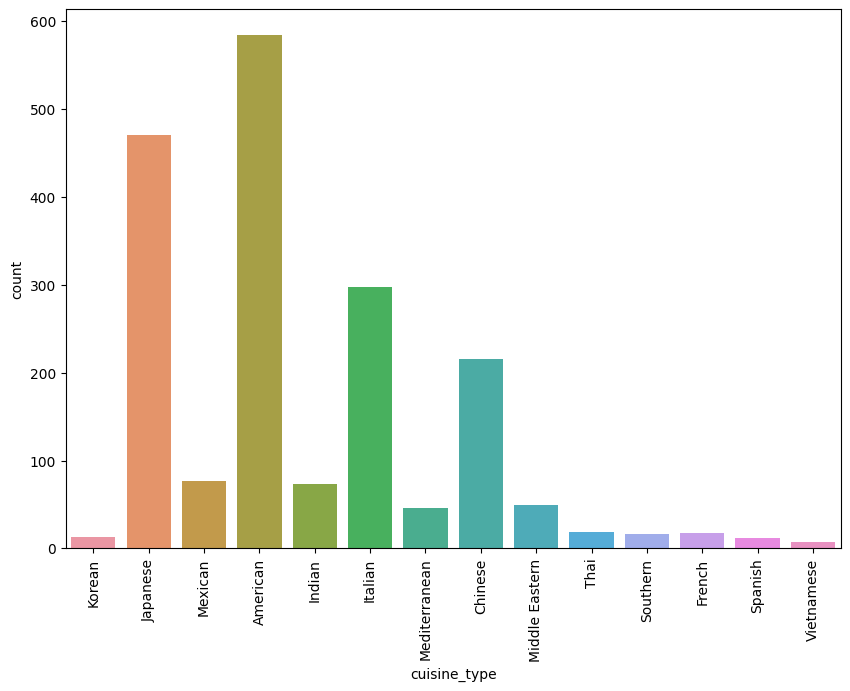

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x="cuisine_type")
plt.xticks(rotation=90)
plt.show()

Observation:
* There are 14 types of unique Cuisines in Dataset.
* American, Japanese, Italian and Chinese (in that order) are the top most cuisines (number of orders > 200) whereas Spanish, Vietnamese, Korean, French, Southern and Thai cuisines are least ordered cuisines.

# Cost of the Order

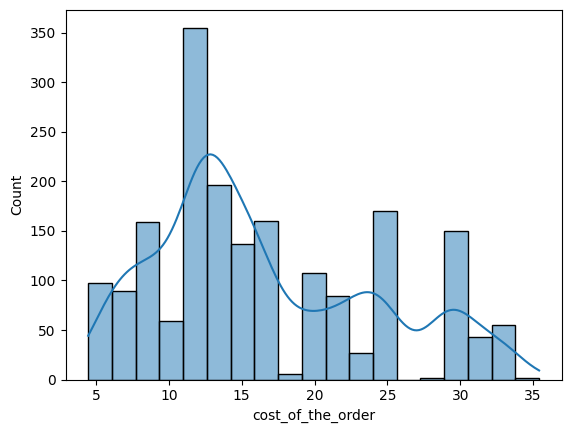

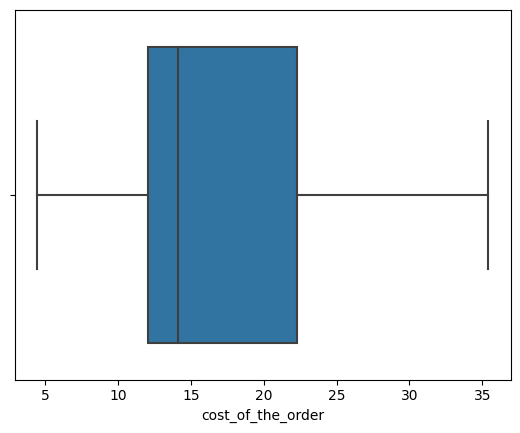

In [ ]:
# Histogram of cost_of_the_order
sns.histplot(data=df,x="cost_of_the_order",kde=True)
plt.show()
#Boxplot of cost_of_the_order
sns.boxplot(data=df,x="cost_of_the_order")
plt.show()


Observation:
* The distribution is skewed towards right.
* There are no outliers observed in variables.
* Median cost_of_order is around $14.
* Maximum orders are around the \$12-\$14 mark (550 orders).


# Day of the Week

In [ ]:
# Get unique values for day of the week
df['day_of_the_week'].nunique()

2

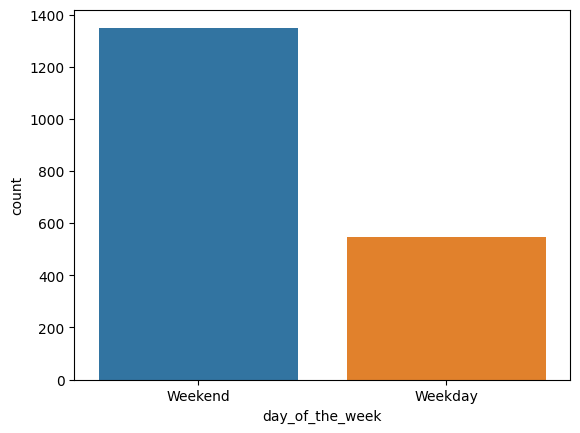

In [ ]:
# countplot of day of the week
sns.countplot(data=df,x="day_of_the_week")
plt.show()


Observations:
* There are more number of orders placed on weekend as compared to weekdays.
* Approximately 1350 orders are placed on weekend whereas on weekdays it's around 550 orders.


# Rating

In [ ]:
# Getting unique values for rating
df['rating'].nunique()

4

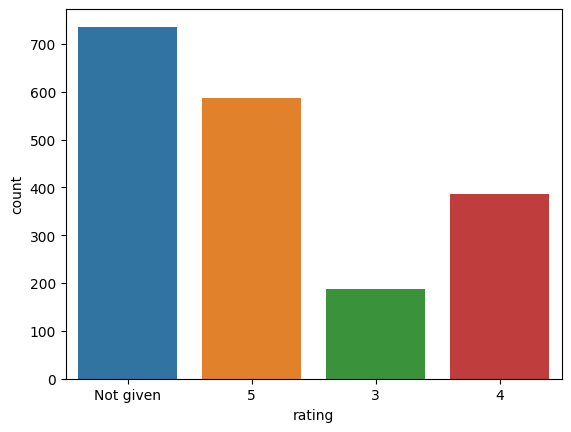

In [ ]:
# Countplot of rating
sns.countplot(data=df,x="rating")
plt.show()
#df[df["rating"] == "5"].shape[0]

Observations:
* As we can observe that there are maxium number (736) of 'Not given' ratings.
* Around 590 customers have rated 5 star rating, 390 customers haved rated 4 stars and around 190 have rated 3 star rating.

# Food Preparartion Time

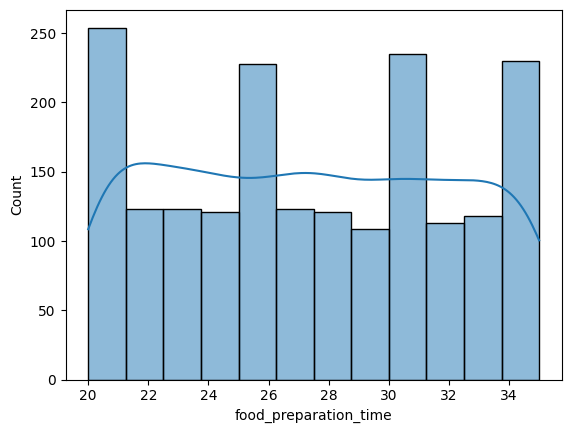

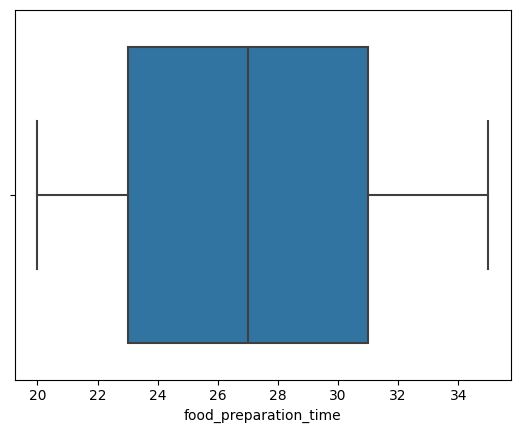

In [ ]:
# Histogram and Box plot of Food preparation time
sns.histplot(data=df,x="food_preparation_time",kde=True)
plt.show()
sns.boxplot(data=df,x="food_preparation_time")
plt.show()

Observations:
* The distribution is flat with some noise.
* There are no oultiers observed.
* Q1 lies at 23 minutes, Median at 27 minutes and Q3 at 31 minutes.

# Delivery Time

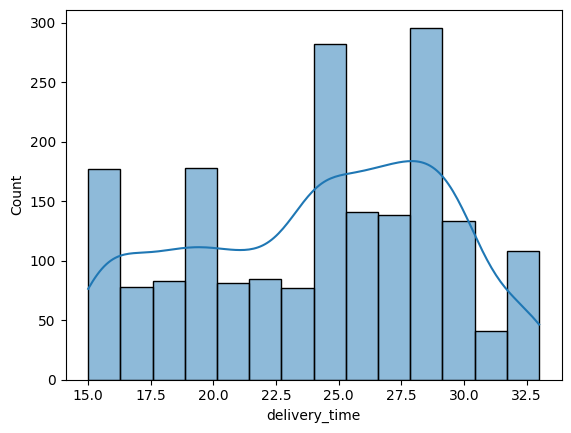

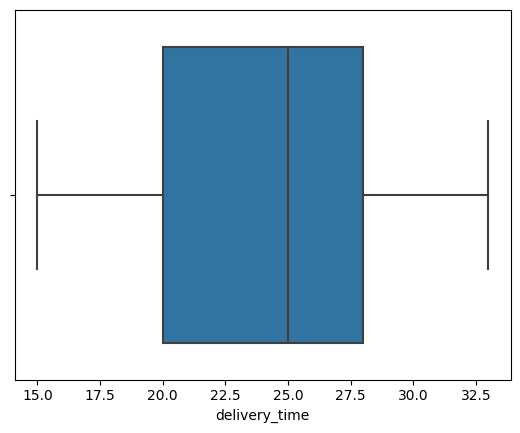

In [ ]:
# Histogram of Delivery time
sns.histplot(data=df,x="delivery_time",kde=True)
plt.show()
# Boxplot of Delivery time
sns.boxplot(data=df,x="delivery_time")
plt.show()

Observations:
* Distribution is skewed towards left.
* No outliers are observed.
* Median lies at 25 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Getting top 5 restaurants in terms of number od orders received
df["restaurant_name"].value_counts().nlargest(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

Observations:
* Restaurant with highest number of orders received is 'Shake shack' and 'The Meatball shop' with second highest orders.

In [ ]:
# Getting top 5 restaurants in terms of number od orders received
df['restaurant_name'].value_counts()[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
# Getting top 5 restaurants in terms of number od orders received
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

Top 5 restaurants and respective order numbers:
* Shake Shack                  219
* The Meatball Shop            132
* Blue Ribbon Sushi            119
* Blue Ribbon Fried Chicken     96
* Parm                          68



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Getting most popular cuisine on weekend
df_weekend = df[df['day_of_the_week']=='Weekend']
df_weekend['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:

American cuisine is the most popular cuisine on weekends with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Getting % of the orders cost more than $20
print("Percentage of orders above 20 dollars:",df[df['cost_of_the_order']>20].shape[0]/df.shape[0] * 100)

Percentage of orders above 20 dollars: 29.24130663856691


#### Observations:
29.24% (555) orders cost more than 20$.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# finding mean order delivery time
print('The mean delivery time for this dataset is',df["delivery_time"].mean())

The mean delivery time for this dataset is 24.161749209694417


#### Observations:
Mean delivery time for all orders in the dataset is 24.16 mins.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Finding top 3 frequent customers
df["customer_id"].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Customer IDs 52832, 47440 and 83287 are respectively the customers who placed most orders with 13, 10 and 9 respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


# Correlation between numberical variables

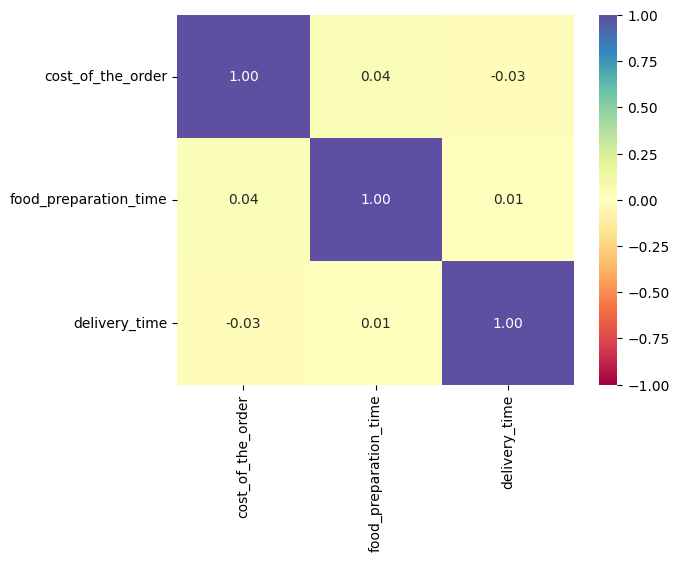

In [ ]:
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, cbar=True, vmin=-1, vmax=1, fmt=".2f", cmap='Spectral')
plt.show()

Observations:
* Above Heatmap shows correlation between 'cost of order', 'food preparation time' and 'delivery time'.
* Food preparation time and cost of the order show very little positive correlation, indicating that the increase in food preparation time leads to a small increase in the cost of order.
* Delivery time and cost of the order show very little negative correlation, indicating there is almost no direct relation between increase in cost of order and increase/decrease in delivery time (as would be expected).

## Cuisine vs Cost of Order

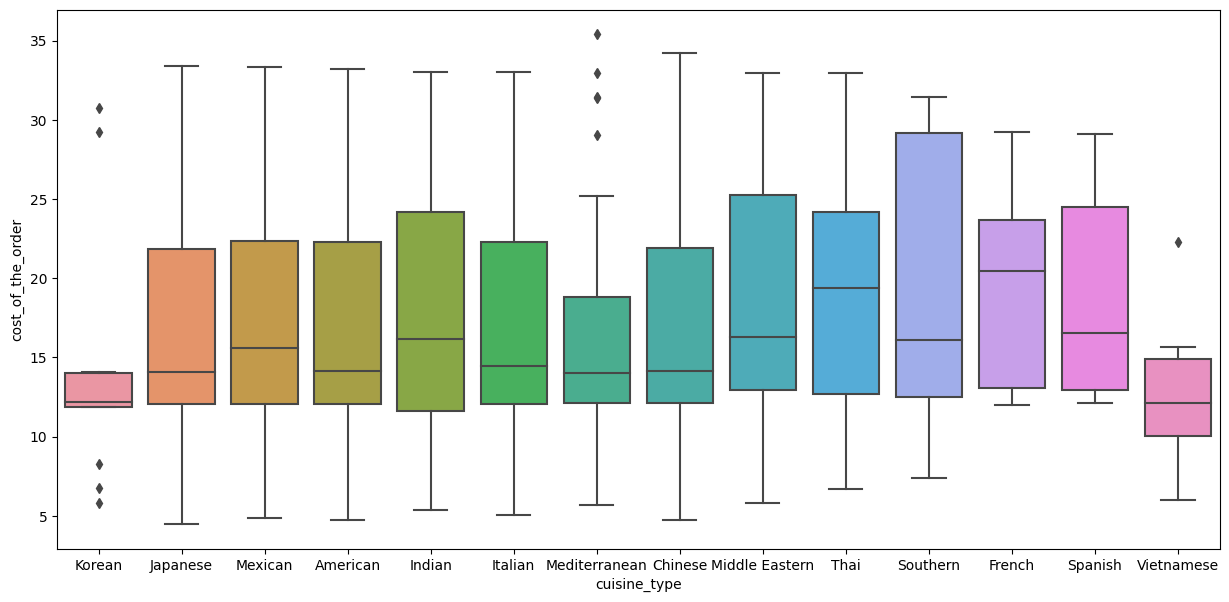

In [ ]:
# Boxplot to see the relation between cost of order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df,y="cost_of_the_order",x="cuisine_type");
plt.show()

Observations:
* The box plots of korean, mediterranean and vietnamese cuisines are comparatively shorter than the other cuisines indicating that there is lesser variability in the cost of the orders in the cuisines in question.
* As we can see that Korean cuisine has few outliers on both ends which indicates few relatively expensive dishes and few relatively cheaper ones.
* Korean, Mediterranean and Vietnamese cuisine orders have a few outliers as well - indicating relatively expesive/cheaper dishes as compared to their distributions.
* All cuisines except for Thai and French cuisines are right skewed.
* Median cost of any dishes in any of the cuisines lies around the \$12 - \$20 price range.
* Southern cuisine has a few dishes on the higher price point seeing as its Q3 is higher than other cuisines around \$30.
* Although Korean and Mediterranean cuisines have few outliers, most of the dishes in Korean, Mediterranean or Vietnamese cuisines are relatively more affordable than their counterparts in other cuisines.


# Cuisine vs Food preparation Time

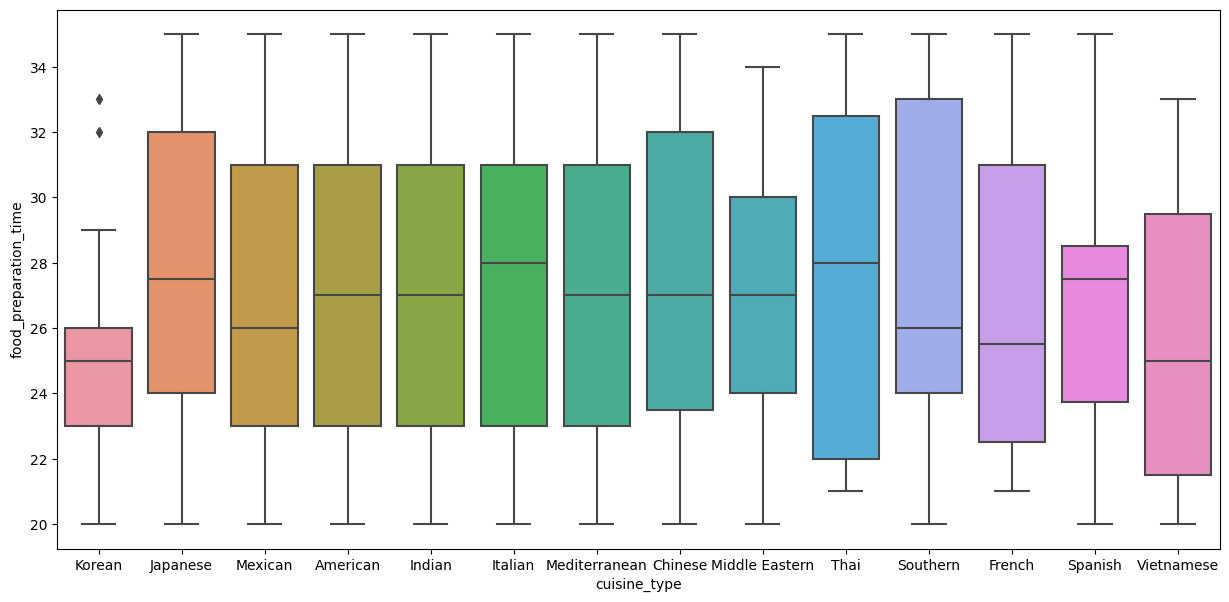

In [ ]:
# Boxplot to see the relation between food_preparation_time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df,y="food_preparation_time",x="cuisine_type");
plt.show()

Observations:
* Most of the dishes in Korean and Spanish cuisines take around 23 - 28 minutes to cook (Q1-Q3 range is pretty tight) as compared to other cuisines.
* As we can see that Korean cuisine has few outliers indicating there are few dishes that take longer time to be prepared than most of the other Korean dishes.
* Japanese, Mexican, Chinese and Southern cuisines are all positively/right skewed which indicates that more of the dishes in these cuisines take more time to prepare as compared to dishes in the other cuisines in the same quartile.
* Korean, Italian, Thai and Spanish cuisines are negatively/left skewed which indicates more of their dishes take less time to prepare as compared to dishes of other cuisines in the same quartile.
* American, Indian, Mediterranean and middle eastern cuisines all have normal distribution with no skew.
* Median food preperation time of all the cuisines lies between 25 - 28 minutes.


## Cuisine vs Delivery Time

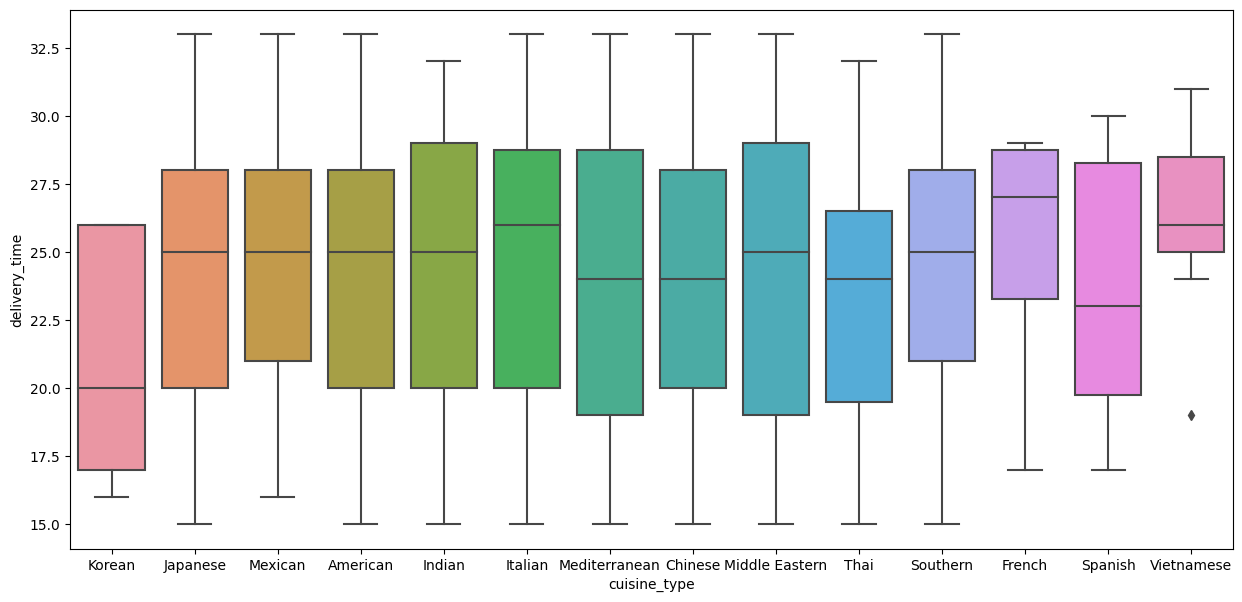

In [ ]:
# Boxplot to see the relation between deliverytime and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df,y="delivery_time",x="cuisine_type");
plt.show()

Observations:
* We can see that Korean cuisine food delivery is the fastest overall as compared to other cuisines.
* Vietnamese cuisine has an outlier on the lower end indicating it has one dish / one restaurant that delivers faster than all other orders.
* Korean, Spanish and Vietnamese cuisine delivery times are right skewed. All the other cuisine delivery times are left skewed.
* Median delivery times for most of the cuisines ranges between 21 - 26 minutes except for korean cuisine which has a median delivery time of 20 minutes.



# Day of the week vs Delivery time

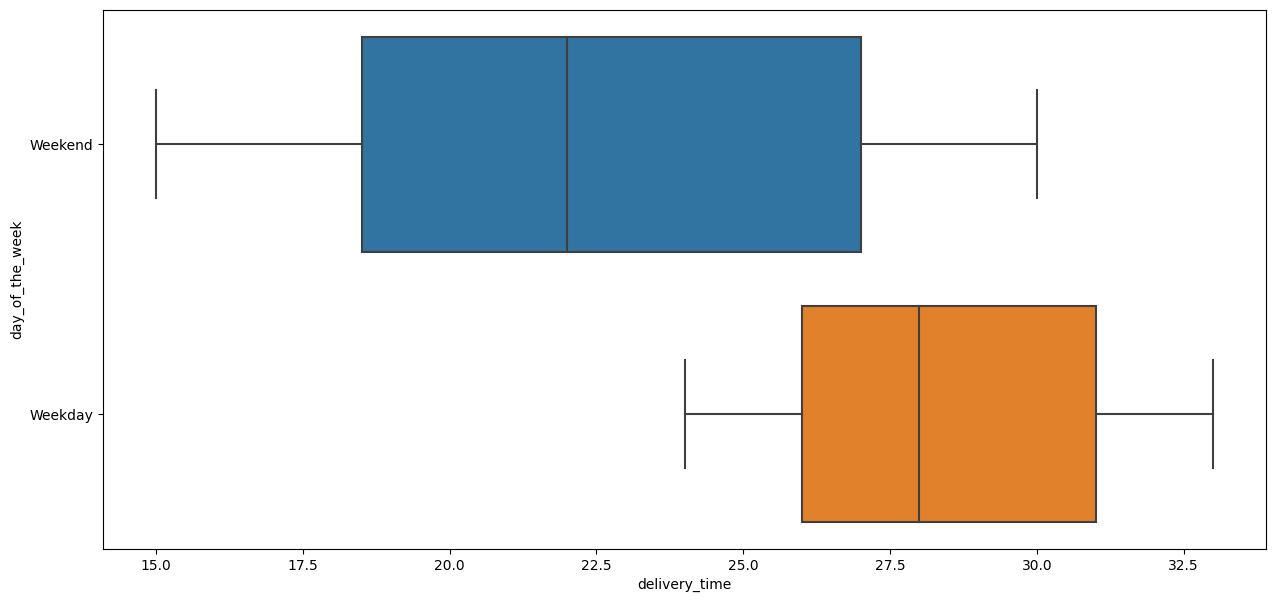

In [ ]:
# Boxplot to see the relation between deliverytime and day of the week
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x="delivery_time",y="day_of_the_week");
plt.show()

Observations:

*   Both the weekend and the weekday delivery time boxplots are positively (right skewed).
*   The median delivery time on the weekend is around 22 minutes while the weekday median delivery time is around 28 minutes. This indicates, it takes longer to deliver food on the weekdays as compared to the weekends.
*   The delivery times are shorter on the weekends despite large number of orders being placed on the weekends suggest efficient delivery on the weekends (more delivery persons, less traffic etc).

# Food delivery Time vs Food Preparation Time

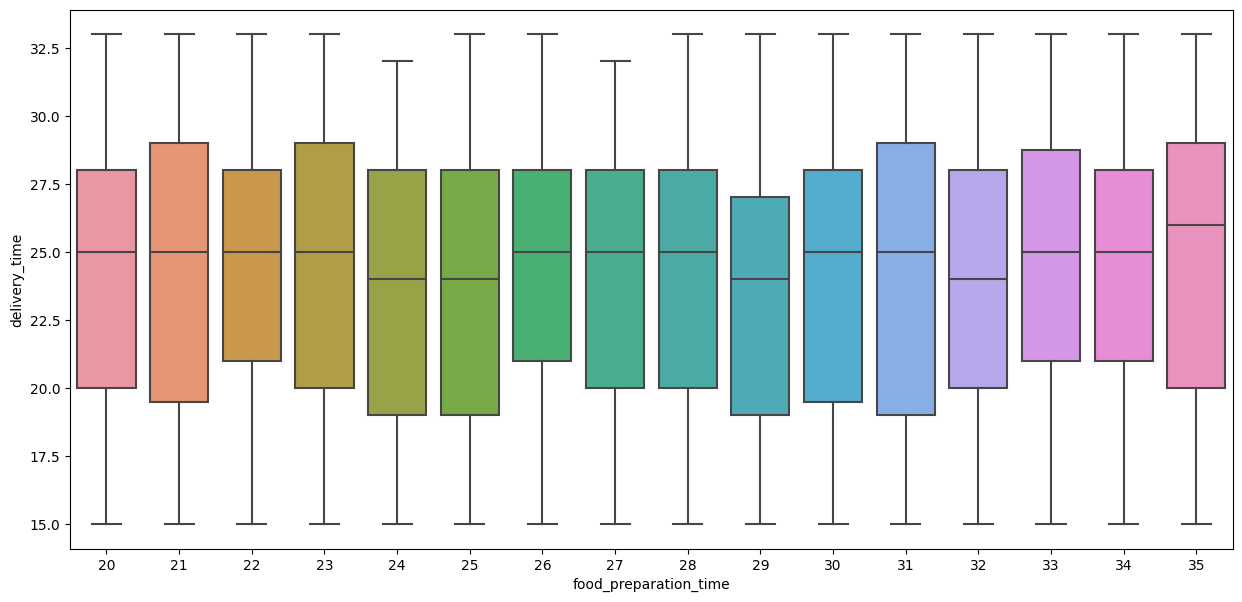

In [ ]:
# Boxplot to see the relation between deliverytime and food preparation time
plt.figure(figsize=(15,7)) #check
sns.boxplot(data=df,y="delivery_time",x="food_preparation_time");
plt.show()

Observations:
* There appears to be no correlation between food delivery time and food preperation time.
* Irrespective of food preperation time, the delivery time of most orders are between 15 to 33 mins.
* The median food delivery times are between 23 - 26 minutes for all orders irrespective of their food preperation time.

# Revenue generated by restaurants

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(15)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Momoya                            492.13
Name: cost_of_the_order, dtype: float64

Observations:
* The top 15 restaurants in terms of revenue generated are shown above.
* Shake Shack generated a total revenue of \$3579.53 with maximum number of orders.

# Rating vs Delivery Time

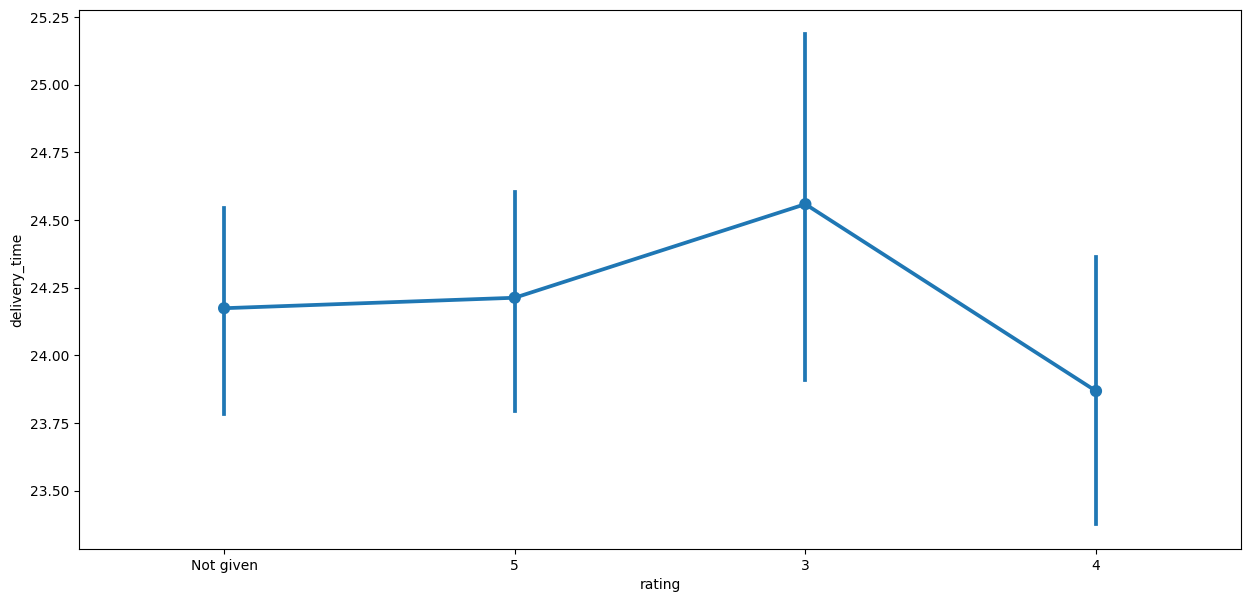

In [ ]:
# Point plot to see the relation between delivery time and ratings
plt.figure(figsize=(15,7))
sns.pointplot(data=df,y="delivery_time",x="rating");
plt.show()

Observations:
* Longer delivery times are associated with lower rated orders although not by much. The mean delivery time for 3 star rated orders is around 24.50 minutes while 4 star, 5 star and not rated orders are all around mean delivery times of 24.25 minutes or lower.
* 4 star rated orders have the best mean delivery time with around 23.75 minutes.
* Here we can say that delivery time and rating have indirect relation.

# Rating vs Food Preparation Time

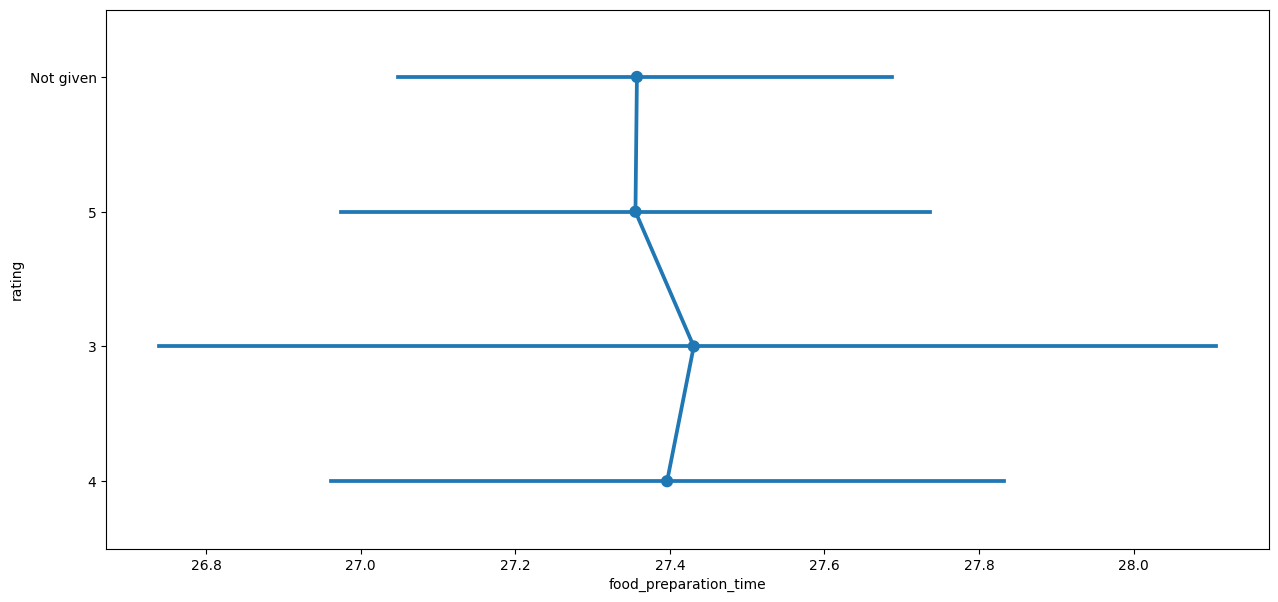

In [ ]:
# Boxplot to see the relation between food preparation time and rating
plt.figure(figsize=(15,7))
sns.pointplot(data=df,x="food_preparation_time",y="rating");
plt.show()

Observations:
* As we can see that mean food preparation time for all rating classifications is approximately 27.4 minutes.
* Food preparation time for 3 star rated orders has longest error bar which indicates that a variety of orders taking 26.5 - 28.4 minutes to prepare are all rated 3 stars.

# Rating vs Cost of Order

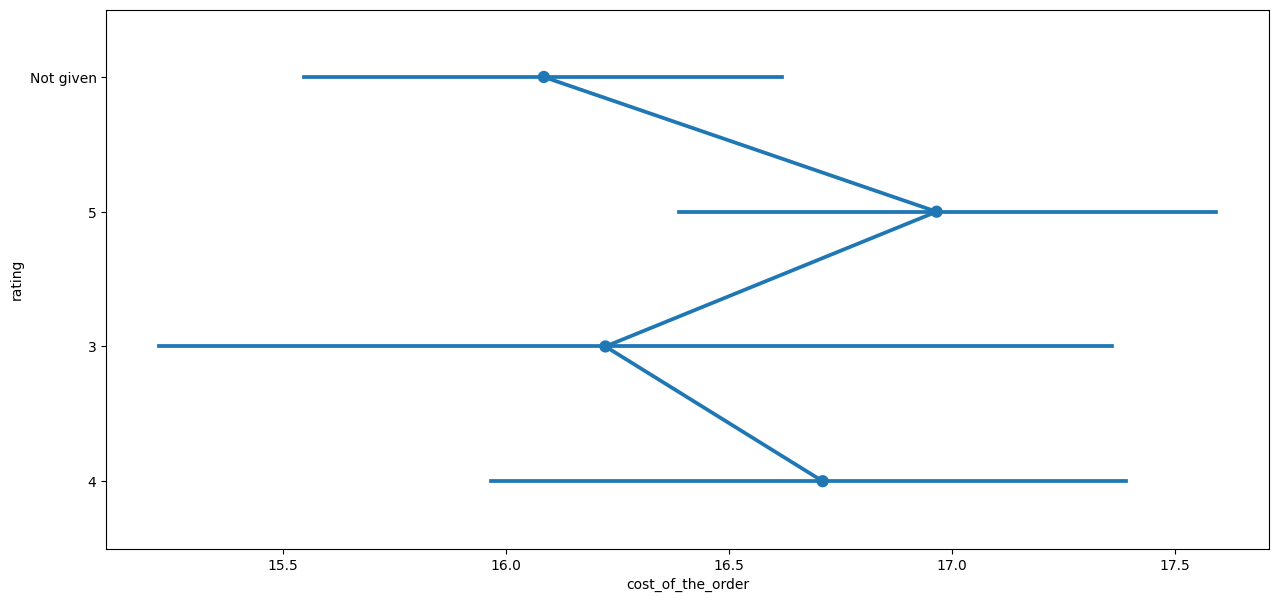

In [ ]:
# Boxplot to see the relation between cost of order and rating
plt.figure(figsize=(15,7))
sns.pointplot(data=df,x="cost_of_the_order",y="rating");
plt.show()

Observations:
* Food orders rated 4 and 5 stars have a higher mean cost of the order than 'Not given' and 3 star rated food orders which shows an indirect positive correlation between rating and cost of the order, that is to say, higher costing orders have higher rating.
* Cost of food orders rated 3 has longest error bar which indicates that various orders ranging from \$15.1 to \$17.4 are all rated 3 stars.
* Rating 'Not given' has shortest error bar which indicates that it has lower standard deviation as compared to other ratings.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# filter the rating column for all orders that are rated
df1 = df[df['rating']!="Not given"].copy()
# converting type of rating from object to integer
df1['rating'] = df1['rating'].astype('int')
# creating data frame which contains restaurant name with ratings
df2 = df1.groupby('restaurant_name')['rating'].count().reset_index()
# print(df2.head())
# list of reataurant names with rating greater than 50
rest_names = df2[df2['rating'] > 50]['restaurant_name']
# get a data frame of with restaurant names matching names in restaurant name lists with rating count more than 50
df_final = df1[df1['restaurant_name'].isin(rest_names)]
# grouping the restaurant name with rating and find the mean rating
df_final.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
The restaurants fulfilling the criteria to get the promotional offer are:
1. The Meatball Shop - mean rating 4.51
2. Blue Ribbon Fried Chicken - mean rating 4.33
3. Shake Shack - mean rating 4.28
4. Blue Ribbon Sushi - mean rating 4.22


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# Find all orders costing > 20$ and get 25% of the total amount
# Find all orders costing < 5$ and less than 20$ and get 15% of the total amount
# add these amounts to get total revenue.

(df[df['cost_of_the_order']>20]['cost_of_the_order'].sum() * 0.25) + (df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<= 20)]['cost_of_the_order'].sum() * 0.15)

6166.303

#### Observations:
* The net revenue generated by the company across all orders is \$6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Getting total time required to deliver food
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df[df['total_time']>60].count().shape[0]/df.shape[0] * 100

0.5268703898840885

In [ ]:
# Getting total time required to deliver food
print("Percentage of orders take more than 60 mins : %.2f" %(df[df['food_preparation_time']+df['delivery_time']>60].count().shape[0]/df.shape[0] * 100),"%")

Percentage of orders take more than 60 mins : 0.53 %


#### Observations:
* Percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is 0.53% (less than 1% of the total orders).


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Getting mean delivery time of orders on weekdays and weekends
print('The mean delivery time on weekdays is around',round(df.groupby(by=["day_of_the_week"])["delivery_time"].mean()))

The mean delivery time on weekdays is around day_of_the_week
Weekday    28.0
Weekend    22.0
Name: delivery_time, dtype: float64


#### Observations:

* The mean delivery time on weekdays is 28 minutes and on the weekend is 22 minutes. So food is prepared faster on the weekends by an average of 5 mins.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Insights:
* Analyzed a Dataset of 1898 orders from 178 unique restaurants in the New York area. The data spanned over weekdays and weekends.The main objective of this analysis is food aggregator company wants to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.

We have been able to conclude that -
1. FoodHub is the most popular online food delivery service in New York.
2. Demand of food delivery service on the weekend is more than double the demand on weekdays.
3. Selective cuisines are more popular for online food delivery service. The two most ordered cuisines are American and Japanese cuisines.
4. Most of the customers have either rated their food 4 star and up or not rated their order. Only a very few customers have given a 3 star rating. There are no ratings below 3 stars in the dataset.
5. FoodHub has a loyal customer base which keeps ordering from the platform as seen from customers reordering food on the app - same orders from the same customer id. Some of the customers have ordered food as much as 10 times during the period of this survey.
6. Food preparation time and Cost of the order has small amount of correlation between them. Higher food preperations times are associated with higher order costs, although not by a big margin.
7. Food delivery time and ratings are indirectly related to eachother. Higher food delivery times are associated with a lower rating, again not by a big margin.
8. It is encouraging to see that New Yorkers trust FoodHub services for their food in their hectic lifestyle.

We can also conclude that people use FoodHub more on their work offs.
We need to further investigate the low demand for FoodHub on Weekdays.

### Recommendations:

* New York is a potential growth market for FoodHub, if they are looking to expand.
* Demand on the weekend is high so need to keep up the momentum by assuring the availability of more delivery persons on the weekend.
* Less number of orders are observed on weekdays so need to procure more data to analyze the reason behind it and find optimum solution for it.
* If onboarding new restaurants, higher priority should be given to American, Japanese, Italian and Chinese (in that order), since that is what the customers prefer more.
* Need to increase popularity of other cuisines too.
* Few restaurants are doing really well but need to work with other restaurants to increase their demand and popularity on the platform.
* Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are top 5 restaurants in terms of the number of orders they receive, the mean ratings and the revenue they generate. Food delivery should be prioritized at these restaurants more than others and customers ordering from these restaurants should be given priority since they bring in the most revenue.

---